Below is the code for the calculation of standard deviation of GPAs, as well as absolute difference of Females and Males in each subgroup. 

In [10]:
import csv
from math import sqrt

# Load the CSV file
csvlist = []
with open("/Users/moehan/Downloads/Grouped_student1.csv", mode='r') as file:
    csv_reader = csv.reader(file)
    for lines in csv_reader:
        csvlist.append(lines)

# Create dictionaries to store gender counts and GPA
gender_counts = {}
gpa_data = {}

for row in csvlist[1:]:
    tutorial_group = row[0]  # Tutorial Group
    group_number = row[6]         # Group Number
    gender = row[4]           # Gender
    try:
        gpa = float(row[5])    # GPA
    except ValueError:
        continue  # Skip non-numeric values

    # Organize gender counts
    if tutorial_group not in gender_counts:
        gender_counts[tutorial_group] = {}
    if group_number not in gender_counts[tutorial_group]:
        gender_counts[tutorial_group][group_number] = {'Male': 0, 'Female': 0}
    if gender in gender_counts[tutorial_group][group_number]:
        gender_counts[tutorial_group][group_number][gender] += 1

    # Collect GPAs for statistics
    if tutorial_group not in gpa_data:
        gpa_data[tutorial_group] = {}
    if group_number not in gpa_data[tutorial_group]:
        gpa_data[tutorial_group][group_number] = []
    gpa_data[tutorial_group][group_number].append(gpa)

combined_identifiers = [] 
# Print gender counts and modulus difference, and calculate GPA statistics
for tutorial_group, group_numbers in gender_counts.items():
    print(f"Tutorial Group: {tutorial_group}")
    for group_number, counts in group_numbers.items():
        # Calculate absolute difference
        absolute_difference = abs(counts['Female'] - counts['Male'])
        print(f"  Group Number: {group_number} | Males: {counts['Male']} | Females: {counts['Female']} | Absolute Difference: {absolute_difference}")

        # Calculate mean and standard deviation for GPA
        gpas = gpa_data[tutorial_group][group_number]
        mean = sum(gpas) / len(gpas) if gpas else 0
        variance = sum((x - mean) ** 2 for x in gpas) / len(gpas) if gpas else 0
        std_dev = sqrt(variance)

        print(f"    Mean GPA: {mean:.2f} | Standard Deviation: {std_dev:.3f}")

        # Create combined identifier
        combined_identifier = f"{tutorial_group}-{group_number}"
        combined_identifiers.append(combined_identifier)




Tutorial Group: G-1
  Group Number: 5 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.10 | Standard Deviation: 0.076
  Group Number: 2 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.10 | Standard Deviation: 0.135
  Group Number: 4 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.11 | Standard Deviation: 0.076
  Group Number: 6 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.09 | Standard Deviation: 0.077
  Group Number: 1 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.25 | Standard Deviation: 0.209
  Group Number: 7 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.07 | Standard Deviation: 0.085
  Group Number: 9 | Males: 3 | Females: 2 | Absolute Difference: 1
    Mean GPA: 4.04 | Standard Deviation: 0.088
  Group Number: 3 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.11 | Standard Deviation: 0.082
  Group Number: 10 | Males: 2 | Females: 3 | Absolute Difference: 1


Below is the code for the plotting of the following graphs:
1. 3D scatter plot of Assigned Group Fairness
2. Bar chart of Absolute Difference (Female-Male) in each Subgroup
3. Bar chart of Number of Unique Schools in each Subgroup
4. Bar chart of Standard Deviation of GPAs in each Subgroup

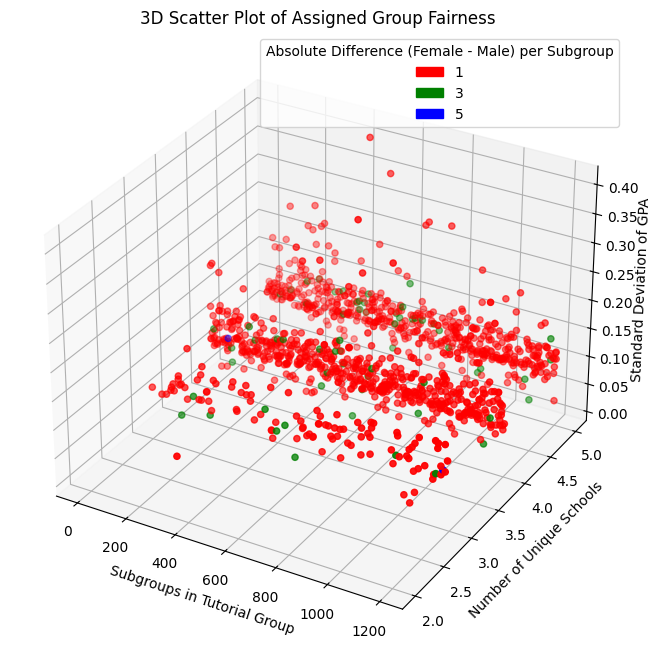

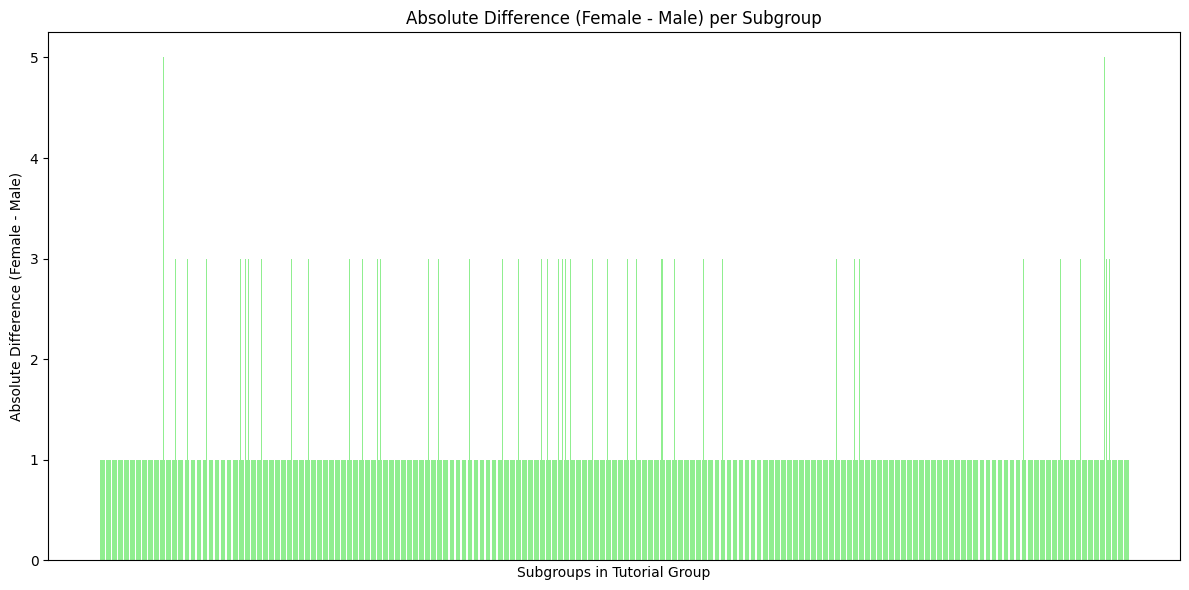

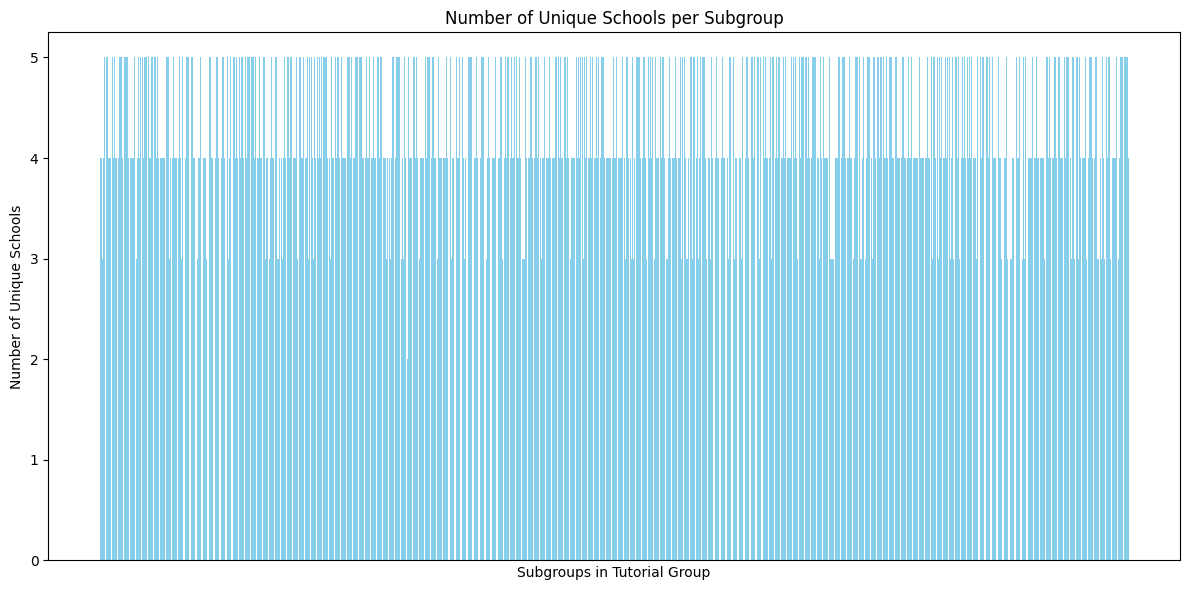

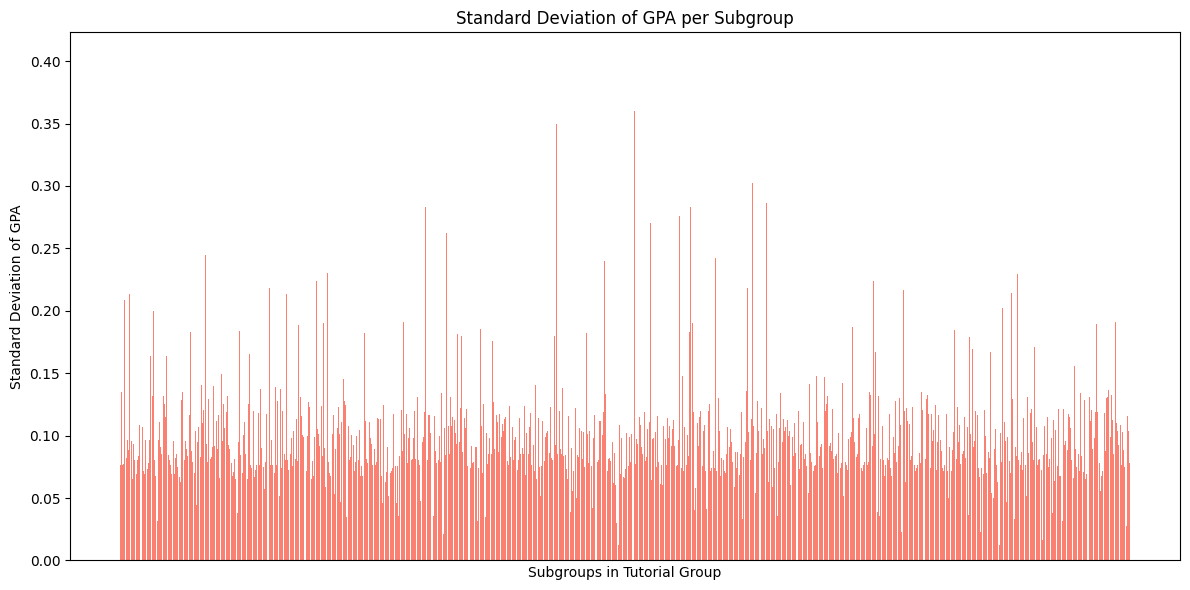

In [12]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # For the legend


# Create dictionaries to store gender counts, GPA data, and school variety
gender_counts = {}
gpa_data = {}
school_variety = {}

with open("/Users/moehan/Downloads/Grouped_student1.csv", mode='r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  
    for row in csv_reader:
        tutorial_group, group_number, gender, school = row[0], row[6], row[4], row[2]
        try:
            gpa = float(row[5])
        except ValueError:
            continue  # Skip non-numeric GPA values

        # Ensure necessary dictionaries exist for gender counts, GPA data, and school variety
        if tutorial_group not in gender_counts:
            gender_counts[tutorial_group] = {}
        if group_number not in gender_counts[tutorial_group]:
            gender_counts[tutorial_group][group_number] = {'Male': 0, 'Female': 0}

        if tutorial_group not in gpa_data:
            gpa_data[tutorial_group] = {}
        if group_number not in gpa_data[tutorial_group]:
            gpa_data[tutorial_group][group_number] = []

        if tutorial_group not in school_variety:
            school_variety[tutorial_group] = {}
        if group_number not in school_variety[tutorial_group]:
            school_variety[tutorial_group][group_number] = set()

        # Update the data
        gender_counts[tutorial_group][group_number][gender] += 1
        gpa_data[tutorial_group][group_number].append(gpa)
        school_variety[tutorial_group][group_number].add(school)

# Prepare data for plotting
x, y, z, colors = [], [], [], []
absolute_differences = []  # To hold modulus differences for bar graph
unique_schools_counts = []  # To hold counts of unique schools
std_dev_gpas = []           # To hold standard deviations of GPAs
labels = []                 # Labels for each bar
distinct_values = {1: 'red', 3: 'green', 5: 'blue'}

# Process the data for plotting
for tutorial_group, groups in gender_counts.items():
    for group_number, counts in groups.items():
        # Modulus difference and color
        modulus_difference = abs(counts['Female'] - counts['Male'])
        color = distinct_values.get(modulus_difference)
        colors.append(color)
        absolute_differences.append(modulus_difference)

        # GPA standard deviation
        gpas = gpa_data[tutorial_group][group_number]
        mean = sum(gpas) / len(gpas) if gpas else 0
        std_dev = sqrt(sum((x - mean) ** 2 for x in gpas) / len(gpas)) if gpas else 0
        std_dev_gpas.append(std_dev)

        # Unique schools
        unique_schools = len(school_variety[tutorial_group][group_number])
        unique_schools_counts.append(unique_schools)

        # Prepare x and label
        y.append(unique_schools)
        x.append(f"{tutorial_group}-{group_number}")
        labels.append(f"{tutorial_group}-{group_number}")

# Convert combined identifiers to numerical values for plotting
x_numerical = list(range(len(x)))

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_numerical, y, std_dev_gpas, c=colors)
ax.set_xlabel('Subgroups in Tutorial Group')
ax.set_ylabel('Number of Unique Schools')
ax.set_zlabel('Standard Deviation of GPA', labelpad=1)

# Add title  
plt.title('3D Scatter Plot of Assigned Group Fairness')

# Create the legend for colors
legend_labels = {1: '1', 3: '3', 5: '5'}  
handles = [mpatches.Patch(color=color, label=legend_labels.get(modulus, f"Modulus {modulus}")) 
           for modulus, color in distinct_values.items()]
plt.legend(handles=handles, title="Absolute Difference (Female - Male) per Subgroup")

# Show the 3D scatter plot
plt.show()

# Create bar chart for modulus differences
plt.figure(figsize=(12, 6))
plt.bar(labels, absolute_differences, color='lightgreen')
plt.xticks([])  # Removes tick marks and labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Subgroups in Tutorial Group')
plt.ylabel('Absolute Difference (Female - Male)')
plt.title('Absolute Difference (Female - Male) per Subgroup')
plt.tight_layout()
plt.show()

# Create bar chart for unique schools
plt.figure(figsize=(12, 6))
plt.bar(labels, unique_schools_counts, color='skyblue')
plt.xticks([])  # Removes tick marks and labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Subgroups in Tutorial Group')
plt.ylabel('Number of Unique Schools')
plt.title('Number of Unique Schools per Subgroup')
plt.tight_layout()
plt.show()

# Create bar chart for standard deviations of GPAs
plt.figure(figsize=(12, 6))
plt.bar(labels, std_dev_gpas, color='salmon')
plt.xticks([])  # Removes tick marks and labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Subgroups in Tutorial Group')
plt.ylabel('Standard Deviation of GPA')
plt.title('Standard Deviation of GPA per Subgroup')
plt.tight_layout()
plt.show()
